# Dimensionality and Feature Selection
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 10/11/2022

## Part 1

In [1]:
#Import the housing data as a data frame and ensure that the data is loaded properly.
import pandas as pd
import numpy as np

df_housing = pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Drop the "Id" column and any features that are missing more than 40% of their values.
df_housing = df_housing.drop('Id', axis = 1)

# Create the percent of all features and set it to a dataframe to find which other columns to drop.
percent_missing = df_housing.isnull().sum() * 100 / len(df_housing)
missing_value_df = pd.DataFrame({'column_name': df_housing.columns,
                                 'percent_missing': percent_missing})
# Sort the values.
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

# Remove the PoolQC, MiscFeature, Alley, Fence, and FireplaceQu columns
df_housing = df_housing.drop(['PoolQC', 'MiscFeature', 
                'Alley', 'Fence','FireplaceQu'], axis = 1)
df_housing.shape

(1460, 75)

In [3]:
# For numerical columns, fill in any missing data with the median value.
# Numeric columns left with missing values: LotFrontage, GarageYrBlt, MasVnrArea
df_housing['LotFrontage'] = df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())
df_housing['GarageYrBlt'] = df_housing['GarageYrBlt'].fillna(df_housing['GarageYrBlt'].median())
df_housing['MasVnrArea'] = df_housing['MasVnrArea'].fillna(df_housing['MasVnrArea'].median())

In [4]:
# For categorical columns, fill in any missing data with the most common value (mode).
# Categorical columns left with missing values: GarageType, GarageCond, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure,
#  BsmtFinType1, BsmtCond, BsmtQual, MasVnrType, Electrical
categorical_columns = df_housing.select_dtypes( include ='object').columns

df_housing[categorical_columns] = df_housing[categorical_columns].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [5]:
# Convert the categorical columns to dummy variables.
# Set the new columns to the dataframe
df_housing_new = pd.get_dummies(df_housing, columns = categorical_columns)

In [6]:
# Split the data into a training and test set, where the SalePrice column is the target.
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_housing_new)

In [7]:
# Run a linear regression and report the R2-value and RMSE on the test set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# Set the target and the features.
target = test.SalePrice
features = test.drop(['SalePrice'],axis=1).values

# Set the ones for train set.
target_train = test.SalePrice
features_train = test.drop(['SalePrice'],axis=1).values

# Create the linear regression model
regression = LinearRegression()

# Fit the linear Regression
model = regression.fit(features, target)

# Calculate the values for train data.
target_probabilities = model.predict(features)

# Print the R2 and RMSE
print(f"R2: {regression.score(features, target)}")
print(f"RMSE: {mean_squared_error(target, target_probabilities, squared = False)}")

R2: 0.9681007533979658
RMSE: 13000.965333800068


In [8]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained.
from sklearn.decomposition import PCA

# Create the PCA
pca = PCA(n_components = 0.90, whiten = True)

# conduct PCA
features_pca = pca.fit_transform(features)

# Show the results.
print(f"Original number of features: {features.shape[1]}")
print(f"Reduced number of features: {features_pca.shape[1]}")

Original number of features: 270
Reduced number of features: 1


In [9]:
# Transform but DO NOT fit the test features with the same PCA.
new_features_pca = pca.transform(features)

In [10]:
# Repeat step 7 with your PCA transformed data.
# Fit the linear Regression
model = regression.fit(features_pca, target)

# Calculate the values for train data.
target_probabilities = model.predict(features_pca)

# Print the R2 and RMSE
print(f"R2: {regression.score(features_pca, target)}")
print(f"RMSE: {mean_squared_error(target, target_probabilities, squared = False)}")

R2: 0.07207060431975632
RMSE: 70120.15278552662


In [11]:
# Take your original training features (from step 6) and apply a min-max scaler to them.
from sklearn.preprocessing import MinMaxScaler

# Create a min max scaler.
scaler = MinMaxScaler()

# Transform the data.
scaled = scaler.fit_transform(features_train)

In [12]:
# Find the min-max scaled features in your training set that have a variance above 0.1 
from sklearn.feature_selection import VarianceThreshold

# Create a threshold of .1
thresholder = VarianceThreshold(threshold = .1)

# Create a high feature variance matrix.
features_high_variance = thresholder.fit_transform(scaled)

thresholder.fit(features_train).variances_

array([1.44545130e+03, 5.79551240e+02, 6.09127247e+07, 1.69543254e+00,
       1.18952149e+00, 7.82730268e+02, 4.22851597e+02, 3.51536460e+04,
       2.51940951e+05, 3.88597711e+04, 2.01180999e+05, 2.37191220e+05,
       1.89648597e+05, 1.90468012e+05, 8.70005359e+02, 3.29882233e+05,
       2.81073372e-01, 3.68849690e-02, 3.06804278e-01, 2.44353537e-01,
       5.81002064e-01, 3.17958341e-02, 2.33900544e+00, 4.17264027e-01,
       5.34817594e+02, 5.05385626e-01, 4.05650813e+04, 1.40719126e+04,
       4.63926301e+03, 3.62321078e+03, 1.18481609e+03, 3.62121881e+03,
       4.85497094e+03, 3.25519985e+04, 7.21591293e+00, 1.84930756e+00,
       2.73221993e-03, 3.43479077e-02, 8.15162319e-03, 1.60000000e-01,
       1.29885532e-01, 5.44942766e-03, 5.44942766e-03, 2.30091950e-01,
       2.92287484e-02, 5.44942766e-03, 2.38874085e-01, 3.94070182e-02,
       2.92287484e-02, 2.66466504e-02, 8.89022331e-02, 0.00000000e+00,
       0.00000000e+00, 1.46368925e-01, 5.66410208e-02, 3.94070182e-02,
      

In [14]:
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
new_features_pca = pca.transform(features)

# The direction for this one is a bit ambiguous...

In [17]:
# Repeat step 7 with the high variance data.
# Fit the linear Regression
model = regression.fit(features_high_variance, target)

# Calculate the values for train data.
target_probabilities = model.predict(features_high_variance)

# Print the R2 and RMSE
print(f"R2: {regression.score(features_high_variance, target)}")
print(f"RMSE: {mean_squared_error(target, target_probabilities, squared = False)}")

R2: 0.6580492102255844
RMSE: 42566.42656369853


When using the model for feature selection, we obtain a reduced amount of features that bring us closer to the end goal of predicting the target.  However, the R2 values are insignificant and the RMSE are extremely high which indicates that they too are also not statistically significant.  When we use the high variance, we can get a closer prediction with the R2 values which  accounts for 65% of the variance.

## Part 2

In [85]:
# Import the data as a data frame and ensure it is loaded correctly.
df_mushrooms = pd.read_csv('mushrooms.csv')
df_mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [86]:
# Convert the categorical features (all of them) to dummy variables.
categorical_columns = df_mushrooms.select_dtypes( include ='object').columns
df_mushrooms_new = pd.get_dummies(df_mushrooms, columns = categorical_columns)

In [87]:
# Split the data into a training and test set.
train, test = train_test_split(df_mushrooms_new)

In [88]:
# Fit a decision tree classifier on the training set.
from sklearn.tree import DecisionTreeClassifier

# Create the classifier.
decision_tree = DecisionTreeClassifier()

target = train['class_e']
features = train.drop(['class_e'],axis=1).values

# Create the same values for the test set to use later.
target_test = test['class_e']
features_test = test.drop(['class_e'],axis=1).values

# Create the model from the features and target.
model = decision_tree.fit(features, target)

# Create a model for the test set as well.
model_test = decision_tree.fit(features_test, target_test)

In [89]:
# Report the accuracy and create a confusion matrix for the model prediction on the test set.
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Create the predictions from the model.
predictions_test = model_test.predict(features_test)

# Create the score from the predictions.
score_test = accuracy_score(target_test,predictions_test)

confusion_matrix = metrics.confusion_matrix(target_test, predictions_test)

# Show the accuracy.
print(f"Accuracy Score: {score_test}")

Accuracy Score: 1.0


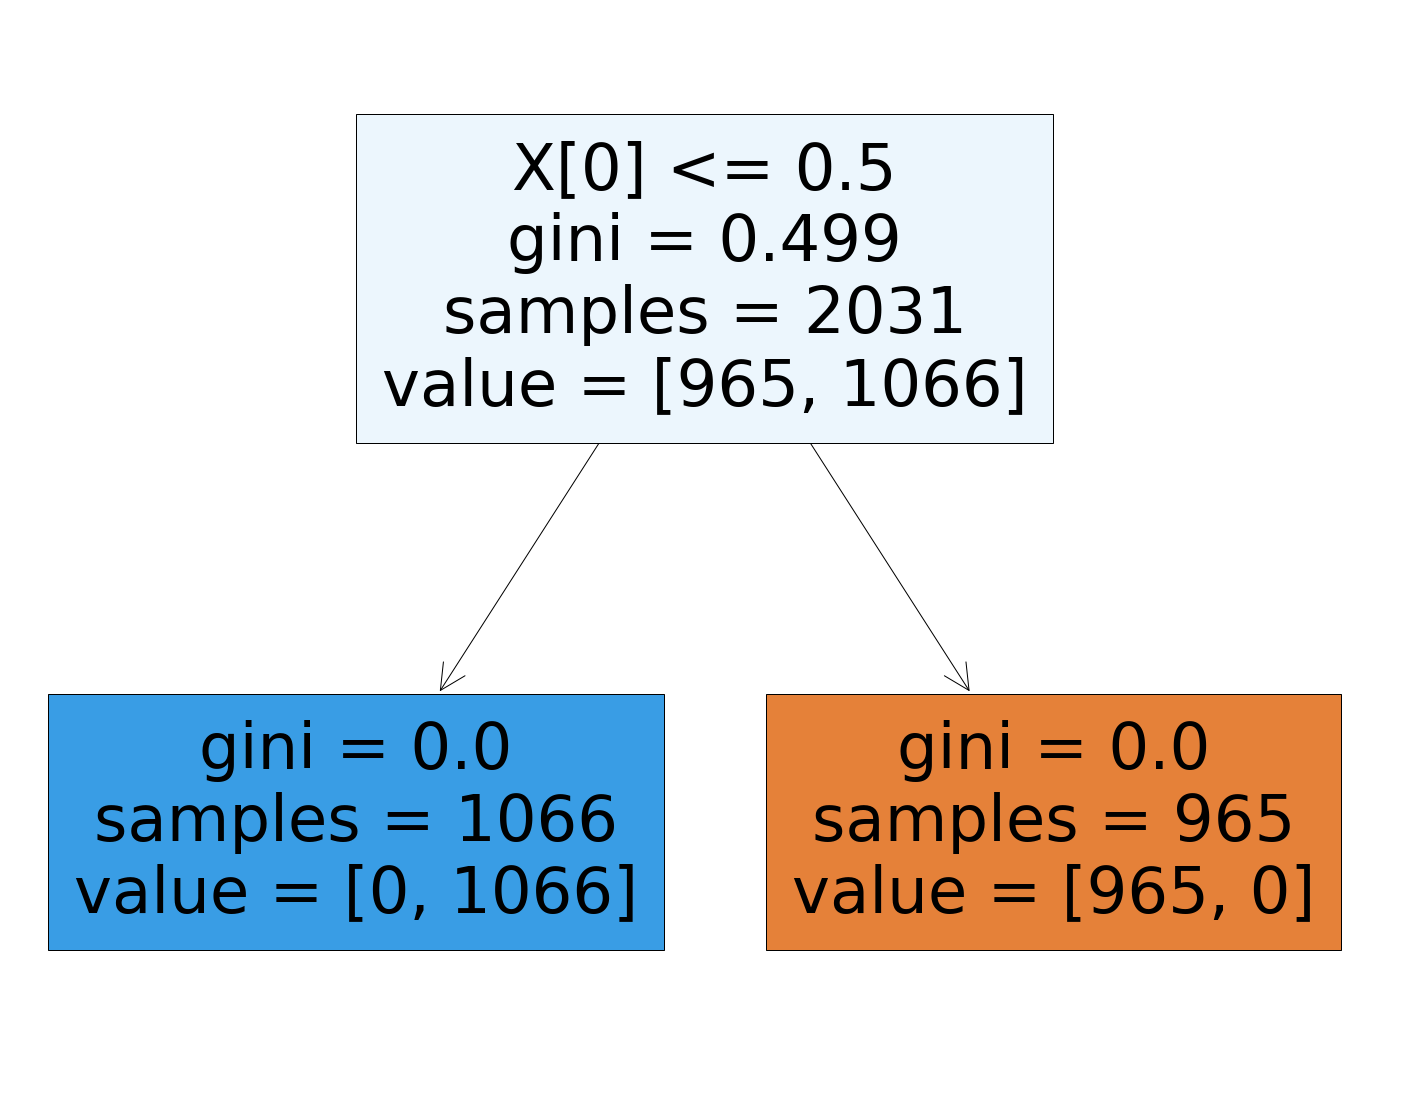

In [90]:
# Create a visualization of the decision tree.
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree,
                   filled=True)

In [91]:
# Use a χ2-statistic selector to pick the five best features for this data (chi2)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select 5 features with the highest chi-squared statistics.
chi2_selector = SelectKBest(chi2, k = 5)
features_kbest = chi2_selector.fit_transform(features, target)

# Show the results.
print(f"Original number of features: {features.shape[1]}")
print(f"Reduced number of features: {features_kbest.shape[1]}")

Original number of features: 118
Reduced number of features: 5


In [92]:
# Which five features were selected in step 7? Hint: Use the get_support function.
from numpy import array 

# Set the feature filter, set the feature names.
cols = chi2_selector.get_support(indices = True)
features_names = df_mushrooms_new.columns[cols]

print(features_names)

Index(['class_e', 'odor_c', 'odor_m', 'stalk-surface-above-ring_f',
       'stalk-surface-below-ring_f'],
      dtype='object')


In [75]:
# Repeat steps 4 and 5 with the five best features selected in step 7.
# Fit a decision tree classifier on the training set.
model_kbest = decision_tree.fit(features_kbest, target)

# Report the accuracy and create a confusion matrix for the model prediction on the test set.
predictions_kbest = model_kbest.predict(features_kbest)

# Create the score from the predictions.
score_kbest = accuracy_score(target,predictions_kbest)

confusion_matrix_kbest = metrics.confusion_matrix(target, predictions_kbest)

# Show the accuracy.
print(f"Accuracy Score: {score_kbest}")
print(confusion_matrix_kbest)

Accuracy Score: 1.0
[[2953    0]
 [   0 3140]]


When attemtping to find what features assist in determining which mushrooms are edible through the use of the chi2 selector, we found that the resulting 5 features were class_e (edible), odor_c (creosote), odor_m (musty), stalk-surface-above-ring_f (fibrous), and stalk-surface-below-ring_f (fibrous); these features are specific to each category after replacing the categories with the dummies.  According to the accuracy score, we can predict them with 100% certainty.